In [1]:
#Unigram and bigram code goes here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse import random
import math 
# import re

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Importing dataset
trainDf = pd.read_csv('train_processed.csv', sep = ',')
testDf = pd.read_csv('test_processed.csv', sep = ',')

In [4]:
trainDf.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [5]:
# c = trainDf[["0.1"]]
# c.head()

In [6]:
tweetsTrain = pd.DataFrame(trainDf)
tweetsTrain.head()

,Unnamed: 0,0,1,0.1
0,0,1,0,USER_MENTION when a father is dysfunctional an...
1,1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,2,3,0,bihday your majesty
3,3,4,0,model i love u take with u all the time in urð
4,4,5,0,factsguide society now motivation


In [7]:
trainTweetsProc = [] # Creating an empty list to store the data set above.
i = 0
while i < tweetsTrain.shape[0]:
    trainTweetsProc.append([tweetsTrain.iloc[i,1], tweetsTrain.iloc[i,2], tweetsTrain.iloc[i,3]]) # Adds each row to the list, excluding the first column of the data set.
    i += 1

trainTweetsP = pd.DataFrame(trainTweetsProc) # Casts the list to a data frame, which is cleaned.
trainTweetsP.head()

,0,1,2
0,1,0,USER_MENTION when a father is dysfunctional an...
1,2,0,USER_MENTION USER_MENTION thanks for lyft cred...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in urð
4,5,0,factsguide society now motivation


In [8]:
tweetsTraining = trainTweetsP[[2]] # Extracts the tweets column from the clean data frame above.
tweetsTraining.head()

,2
0,USER_MENTION when a father is dysfunctional an...
1,USER_MENTION USER_MENTION thanks for lyft cred...
2,bihday your majesty
3,model i love u take with u all the time in urð
4,factsguide society now motivation


In [9]:
tweetTrainingList = [] # Creating an empty list to store the tweets.
i = 0
while i < tweetsTraining.shape[0]:
    tweetTrainingList.append(tweetsTraining.iloc[i,0]) # Adds each tweet to the list.
    i += 1

In [10]:
stringOfTrainTweets = " ".join(tweetTrainingList) # Joins the tweets together into one giant string, with a space between every two consecutive tweets.

In [11]:
stopWords = set(stopwords.words('english'))
tokens = word_tokenize(stringOfTrainTweets)
wordsFiltered = []

for w in tokens:
    if w not in stopWords:
        wordsFiltered.append(w)

In [12]:
#Creating Unigram

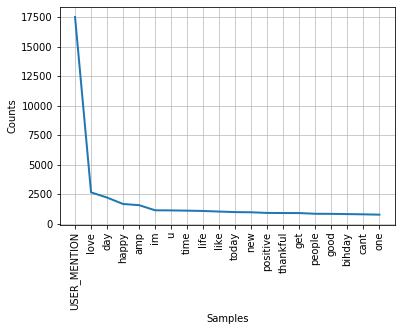

In [13]:
#Plotting unigram
# r = trainDf[["0.1"]]
# trainDf_string = trainDf.to_string()
#creating tokens
# tokens = word_tokenize(stringOfTrainTweets)
vocab = set(wordsFiltered)
frequencyDist = nltk.FreqDist(wordsFiltered)
data = sorted(frequencyDist,key=frequencyDist.__getitem__, reverse=True)
data[0:20]
frequencyDist.plot(20, cumulative=False)

In [14]:
len(vocab) 
# So, proportionally num. of sparse vector = 3440
#and num of dense vector = 20,650

41435

In [15]:
sparseVector = data[0:3430]
denseVector = data[0:20580]
denseVector[0:10]

['USER_MENTION',
 'love',
 'day',
 'happy',
 'amp',
 'im',
 'u',
 'time',
 'life',
 'like']

In [16]:
# def generate_ngrams(s, n):
    
#     # Replace all none alphanumeric characters with spaces
#     s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    
#     # Break sentence in the token, remove empty tokens
#     tokens = [token for token in s.split(" ") if token != ""]
    
#     # Use the zip function to help us generate n-grams
#     # Concatentate the tokens into ngrams and return
#     ngrams = zip(*[token[i:] for i in range(n)])
#     return [" ".join(ngram) for ngram in ngrams]

In [17]:
# a = 'today was so cool. i did nothing. amazing, right?'

In [18]:
# generate_ngrams(a, n=2)

In [19]:
# b = 'time to go home! next time, we will go to the cinema. how does that sound? do you want to go to the cinema?'

In [20]:
# #Trial : To be del.
# tokens = [token for token in stringOfTrainTweets.split(" ") if token != ""]
# output = list(ngrams(tokens, 2))

In [21]:
output = []
i = 0
while i < len(tweetTrainingList):
    tokens1 = word_tokenize(tweetTrainingList[i])
    tweetFil = []
    for w in tokens1:
        if w not in stopWords:
            tweetFil.append(w)
    output.extend(list(ngrams(tweetFil, 2)))
    i += 1

In [22]:
# a = "the weather today is pleasant"
# b = a.split(" ")
# print(b)

In [23]:
# output = []
# i = 0
# while i < len(tweetTrainingList):
#     tokens = [token for token in tweetTrainingList[i].split(" ") if token != ""]
#     output.extend(list(ngrams(tokens, 2)))
#     i += 1

In [24]:
output[0:10]

[('USER_MENTION', 'father'),
 ('father', 'dysfunctional'),
 ('dysfunctional', 'selfish'),
 ('selfish', 'drags'),
 ('drags', 'kids'),
 ('kids', 'dysfunction'),
 ('dysfunction', 'run'),
 ('USER_MENTION', 'USER_MENTION'),
 ('USER_MENTION', 'thanks'),
 ('thanks', 'lyft')]

In [25]:
bigrams = set(output)
frequency_dist = nltk.FreqDist(output)
data1 = sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
data1[0:20]

[('USER_MENTION', 'USER_MENTION'),
 ('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u'),
 ('cant', 'wait'),
 ('u', 'take'),
 ('take', 'u'),
 ('u', 'time'),
 ('model', 'love'),
 ('time', 'urð'),
 ('i_am', 'positive'),
 ('blog', 'silver'),
 ('silver', 'gold'),
 ('gold', 'forex'),
 ('altwaystoheal', 'healthy'),
 ('via', 'USER_MENTION'),
 ('polar', 'bear'),
 ('whatever', 'want'),
 ('bull', 'dominate')]

In [26]:
len(data1)

161278

In [27]:
len(bigrams)

161278

In [28]:
bigramsVocab = data1[0:830]
bigramsVocab[0:10]

[('USER_MENTION', 'USER_MENTION'),
 ('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u'),
 ('cant', 'wait'),
 ('u', 'take'),
 ('take', 'u'),
 ('u', 'time'),
 ('model', 'love')]

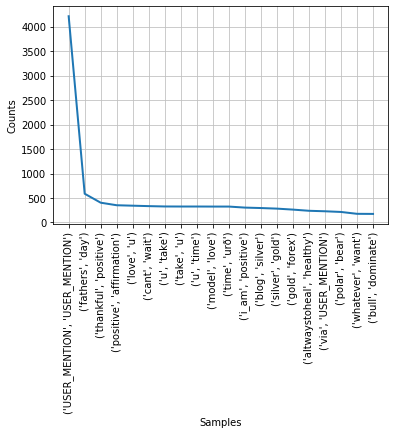

In [29]:
frequency_dist.plot(20, cumulative=False)

In [30]:
vectorizer = CountVectorizer()
>>> vectorizer   

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [31]:
# corpus = [
# ...     'This is the first document.',
# ...     'This is the second second document.',
# ...     'And the third one.',
# ...     'Is this the first document?',
# ... ]
# X = vectorizer.fit_transform(corpus)
# >>> X     

In [32]:
# vectorizer.get_feature_names() == (
# ...     ['and', 'document', 'first', 'is', 'one',
# ...      'second', 'the', 'third', 'this'])

In [33]:
# vectorizer.get_feature_names()

In [34]:
# extract = ['he went to the mall to watch a movie', 'he watched a movie', 'he went cycling with his friends', 'he cooks delicious food']
# extractFil = []
# i = 0
# while i < len(extract):
#     tokens1 = word_tokenize(extract[i])
#     tweetFil = []
#     for w in tokens1:
#         if w not in stopWords:
#             tweetFil.append(w)
#     extractFil.append(" ".join(tweetFil))
#     i += 1
# outputA = []
# i = 0
# while i < len(extract):
#     tokens1 = word_tokenize(extract[i])
#     tweetFil = []
#     for w in tokens1:
#         if w not in stopWords:
#             tweetFil.append(w)
#     outputA.extend(list(ngrams(tweetFil, 1)))
#     i += 1
# setA = set(outputA)
# outputB = []
# i = 0
# while i < len(extract):
#     tokens1 = word_tokenize(extract[i])
#     tweetFil = []
#     for w in tokens1:
#         if w not in stopWords:
#             tweetFil.append(w)
#     outputB.extend(list(ngrams(tweetFil, 2)))
#     i += 1
# setB = set(outputB)
# # len(set(outputA))+len(vectorizer.get_feature_names())
# len(setA)+len(setB)

In [35]:
# words = ['he', 'went', 'to', 'the', 'mall', 'watch', 'a', 'movie', 'the mall']
# M = vectorizer.fit_transform(words)
# vectorizer.get_feature_names()

In [36]:
# A = M.toarray()

In [37]:
# M.toarray()

In [38]:
# print(A[2])

In [39]:
# X.toarray()

In [40]:
# vectorizer.vocabulary_.get('document')

In [41]:
# vectorizer.transform(['Something completely new.']).toarray()

In [42]:
tweetTrainingList[30000]

'i will never msg him first if he dun msg me firstdisappointed'

In [43]:
tweetListFiltered = []
for element in tweetTrainingList:
    words = word_tokenize(element)
    wordsFiltered = []

    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    tweetListFiltered.append(" ".join(wordsFiltered))

In [44]:
tweetListFiltered[30000]

'never msg first dun msg firstdisappointed'

In [45]:
from scipy import sparse 
# >>> bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
# ...                                     token_pattern=r'\b\w+\b', min_df=1)
# >>> analyze = bigram_vectorizer.build_analyzer()
# # tweetListVectors = bigram_vectorizer.fit_transform(tweetListFiltered).toarray()
# tweetVectorsA = sparse.lil_matrix(bigram_vectorizer.fit_transform(tweetListFiltered[0:5000]).toarray())

# # tweetListVectors
# # >>> analyze('Bi-grams are cool!') == (
# # ...     ['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

In [46]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
print(a+b)

[ 7  9 11 13 15]


In [47]:
csc_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [48]:
def get_sparse_size(matrix):
    # get size of a sparse matrix
    return int((matrix.data.nbytes + matrix.indptr.nbytes + matrix.indices.nbytes) / 1024.)

In [49]:
# create a sparse matrix, 1000 x 100000
sparse_mat = random(10 ** 3, 10 ** 5, format='csr')

In [50]:
# get size of a sparse matrix
sparse_size = get_sparse_size(sparse_mat)

In [51]:
# convert sparse matrix to a regular matrix and get its size
regular_size = sparse_mat.toarray().nbytes / 1024.

In [52]:
print("The size of sparse matrix is %s KiB" % sparse_size)
print("The size of regular matrix is %s KiB" % regular_size)
print("Data compression ratio is %s" % (regular_size / sparse_size))

The size of sparse matrix is 11722 KiB
The size of regular matrix is 781250.0 KiB
Data compression ratio is 66.6481829039413


In [53]:
np.random.seed(10)
matrix = random(3, 3, format='lil', density=0.6)
matrix.toarray()

array([[0.        , 0.08833981, 0.16911084],
       [0.        , 0.        , 0.        ],
       [0.19806286, 0.76053071, 0.22479665]])

In [54]:
matrix.data

array([list([0.08833981417401027, 0.16911083656253545]), list([]),
       list([0.19806286475962398, 0.7605307121989587, 0.22479664553084766])],
      dtype=object)

In [55]:
matrix.rows

array([list([1, 2]), list([]), list([0, 1, 2])], dtype=object)

In [56]:
def get_item(row_index, column_index, matrix):
    row_values = matrix.data[row_index]
    row_indices = matrix.rows[row_index]

    value_index = row_indices.index(column_index)
    if value_index >= 0:
        return row_values[value_index]
    else:
        return 0

In [57]:
print(matrix[2, 2])

0.22479664553084766


In [58]:
# analyze(extract[0])

In [59]:
# bigr_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
# analyz = bigr_vectorizer.build_analyzer()
# wordSet = []
# for element in extract:
#     wordSet.extend(analyze(element))
# wordSet

In [60]:
# X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
# >>> X_2

In [61]:
corpus = [
...     'this is the first document',
...     'this is the second second document',
...     'and the third one',
...     'is this the first document',
... ]
    
listOfTokens = ['this', 'is', 'the', 'first', 'first document', 'second document']
[1,1,1,1,1,0]

[1, 1, 1, 1, 1, 0]

In [62]:
# feature_index = bigram_vectorizer.vocabulary_.get('is this')
# >>> X_2[:, feature_index] 

In [63]:
sparseVector.extend(bigramsVocab)

In [64]:
sparseVector[3431:3435]

[('fathers', 'day'),
 ('thankful', 'positive'),
 ('positive', 'affirmation'),
 ('love', 'u')]

In [65]:
sparseVectorMod = sparseVector

In [66]:
i = 3430
while i < len(sparseVectorMod):
    element = " ".join(sparseVectorMod[i])
    sparseVectorMod[i] = element
    i += 1

In [67]:
sparseVectorMod[3431:3435]

['fathers day', 'thankful positive', 'positive affirmation', 'love u']

In [68]:
sparseVectorA = sparseVectorMod[0:3430]

In [69]:
print(sparseVectorA[0])
print(sparseVectorA[3429])

USER_MENTION
instalikeâ


In [70]:
sparseVectorB = sparseVectorMod[3430:4260]

In [71]:
print(sparseVectorB[0])
print(sparseVectorB[829])

USER_MENTION USER_MENTION
love summer


In [72]:
tweetVectors = []
i = 0
while i < len(tweetListFiltered):
    tweetWords = tweetListFiltered[i].split()
    vector = []
    for element in sparseVectorA:
        j = 0
        k = 0
        while j < len(tweetWords):
            if tweetWords[j] == element:
                k += 1
            j += 1
        vector.append(k)
    for element in sparseVectorB:
        bigramWords = element.split()
        j = 0
        k = 0
        while j < len(tweetWords)-1:
            if tweetWords[j] == bigramWords[0] and tweetWords[j+1] == bigramWords[1]:
                k += 1
            j += 1
        vector.append(k)
    tweetVectors.append(vector)
    i += 1
# tweetVectors = np.array([])
# tweetVectors = np.append(tweetVectors, [1, 3, 4])
# tweetVectors = np.append(tweetVectors, [1, 3, 4])
# tweetVectors = np.append(tweetVectors, 1)
# tweetVectors = np.append(tweetVectors, 2)
# tweetVectors.append(1)
# tweetVectors


In [73]:
numTweetsWTerm = []
for element in sparseVectorA:
    m = 0
    for tweet in tweetListFiltered:
        tweetWords = tweet.split()
        if element in tweetWords:
            m += 1
    numTweetsWTerm.append(m)
for element in sparseVectorB:
    m = 0
    for tweet in tweetListFiltered:
        tweetWords = tweet.split()
        big = list(ngrams(tweetWords, 2))
        bigrams = []
        for part in big:
            portion = " ".join(part)
            bigrams.append(portion)
        if element in bigrams:
            m += 1
    numTweetsWTerm.append(m)


In [74]:
len(numTweetsWTerm)

4260

In [75]:
numTweetsWTerm[0:10]

[11098, 2515, 2062, 1593, 1428, 1077, 717, 1090, 1016, 994]

In [76]:
numTweetsWTerm[4250:4260]

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

In [77]:
# svB = ['cute kitten', 'to all']
# texts = ['hello how are you', 'hello to all whats up', 'hello to all the people out there', 'thats a cute kitten']
# numTexts = []
# for element in svB:
#     m = 0
#     for text in texts:
#         words = text.split()
#         big = list(ngrams(words, 2))
#         bigrams = []
#         for part in big:
#             portion = " ".join(part)
#             bigrams.append(portion)
#         if element in bigrams:
#             m += 1
#     numTexts.append(m)
# print(numTexts)

In [78]:
# svA = ['hello', 'to', 'kitten']
# numTxts = []
# for element in svA:
#     m = 0
#     for text in texts:
#         words = text.split()
#         if element in words:
#             m += 1
#     numTxts.append(m)
# print(numTxts)

In [79]:

# big = list(ngrams(texts[0].split(), 2))
# for part in big:
#     portion = " ".join(part)
#     part = portion
# big

In [80]:
tweetVectorsIDF = []
for element in tweetVectors:
    i = 0
    vector = []
    for piece in element:
        term = math.log10((1+len(tweetListFiltered))/(1+numTweetsWTerm[i]))+1
        newTerm = piece * term
        vector.append(newTerm)
        i += 1
    tweetVectorsIDF.append(vector)

In [81]:
# vectorsAA = [[1,2,3],[1,5,9],[1,1,8]]
# numTextsAppears = [50,21,3]
# vectorsIDF = []
# for element in vectorsAA:
#     i = 0
#     vector = []
#     for piece in element:
#         term = math.log10((1+800)/(1+numTextsAppears[i]))+1
#         newTerm = piece * term
#         vector.append(newTerm)
#         i += 1
#     vectorsIDF.append(vector)
# print(vectorsIDF)

In [82]:
# tweetVectorsIDF[5][0:20]

In [83]:
# tweetVectors[5]

In [84]:
# len(tweetVectorsIDF)

In [85]:
idfVectors = np.array(tweetVectorsIDF)

In [86]:
# idfVectors[5][0:20]

In [87]:
tweetVectors1 = []
for tweet in tweetListFiltered:
    tweetWords = tweet.split()
    bigr = list(ngrams(tweetWords, 2))
    bigrams = []
    for part in bigr:
        portion = " ".join(part)
        bigrams.append(portion)
    vector = []
    for element in sparseVectorA:
        if element in tweetWords:
            k = 1
        else:
            k = 0
        vector.append(k)
    for element in sparseVectorB:
        if element in bigrams:
            k = 1
        else:
            k = 0
        vector.append(k)
    tweetVectors1.append(vector)


In [88]:
len(tweetVectors1)

31962

In [89]:
tweetVectors1[500][5:8]

[0, 0, 0]

In [90]:
sparseVectorA[10]

'today'

In [91]:
sparseVectorA.index('talking')

572

In [92]:
tweetVectorsA = np.array(tweetVectors1)

In [93]:
# svA = ['hello', 'how', 'all', 'people']
# svB = ['cute kitten', 'to all']
# texts = ['hello how are you', 'hello to all whats up', 'hello to all the people out there', 'thats a cute kitten']
# vectors = []
# for tweet in texts:
#     tweetWords = tweet.split()
#     bigr = list(ngrams(tweetWords, 2))
#     bigrams = []
#     for part in bigr:
#         portion = " ".join(part)
#         bigrams.append(portion)
#     vector = []
#     for element in svA:
#         if element in tweetWords:
#             k = 1
#         else:
#             k = 0
#         vector.append(k)
#     for element in svB:
#         if element in bigrams:
#             k = 1
#         else:
#             k = 0
#         vector.append(k)
#     vectors.append(vector)
# print(vectors)

# Classification Techniques

# Vaibhav

In [94]:
# Decison Tree Classifier

In [95]:
# tweetVectorA: sparse vector rep. in terms of presence
# trainTweetsP: dataframe containing all training tweet and their sentiment

In [96]:
#Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [97]:
# tweetVectorsA?

In [98]:
# trainTweetsP?

In [99]:
#70:30 Train:Test

In [100]:
# len(tweetVectorsA) = 31962

In [101]:
x = tweetVectorsA[0:22373] #Independent variable
y = trainTweetsP[1][0:22373].to_numpy() #Dependent variable

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split( x, 
                                                     y, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [103]:
#Descision Tree Classifier 

In [104]:
dtc_gini = DecisionTreeClassifier(criterion='gini',random_state=100, max_depth=5)

In [105]:
dtc_gini.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [106]:
Y_pred = dtc_gini.predict(X_test)

In [107]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
print("Accuracy of Decision Tree (gini index) on test data: ", accuracy_score(Y_test, Y_pred)*100)

Accuracy of Decision Tree (gini index) on test data:  93.77234803337306


In [110]:
#Conclusion: DTC accuracy is largely unaffected by different ratios for test and train data

In [111]:
#Goal: Random Forest + xgBoost

In [112]:
#Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30) #Using 30 random trees has given the best accuracy overall
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
model.score(X_test,Y_test) #score of how accurately model has been trained

0.950834326579261

In [115]:
Y_predict = model.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predict)

In [117]:
import seaborn
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'Truth')

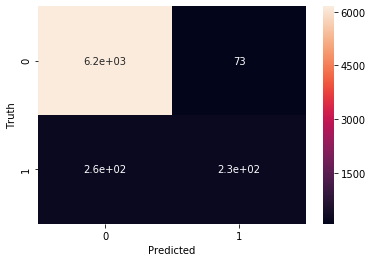

In [118]:
seaborn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [119]:
print("Accuracy of Random Forest on Test data: ", accuracy_score(Y_test, Y_pred)*100)

Accuracy of Random Forest on Test data:  93.77234803337306


In [120]:
#XGBoost Classifier

In [121]:
from xgboost import XGBClassifier

In [122]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
Y_pred = model.predict(X_test)

In [124]:
print("Accuracy of xgBoost on Test data:" ,accuracy_score(Y_test, Y_pred))

Accuracy of xgBoost on Test data: 0.9405542312276519


In [125]:
#Multi-Layer Perceptron

In [126]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0-alpha0


In [138]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 41435

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 100))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         4143500   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,145,133
Trainable params: 4,145,133
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [140]:
history = model.fit(X_train,
                    Y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(X_test, Y_test),
                    verbose=1)    

Train on 15661 samples, validate on 6712 samples
Epoch 1/40
15661/15661 [==============================] - 25s 2ms/sample - loss: 0.6470 - acc: 0.9023 - val_loss: 0.5913 - val_acc: 0.9274
Epoch 2/40
15661/15661 [==============================] - 23s 1ms/sample - loss: 0.5191 - acc: 0.9314 - val_loss: 0.4307 - val_acc: 0.9274
Epoch 3/40
15661/15661 [==============================] - 22s 1ms/sample - loss: 0.3453 - acc: 0.9314 - val_loss: 0.2844 - val_acc: 0.9274
Epoch 4/40
15661/15661 [==============================] - 23s 1ms/sample - loss: 0.2579 - acc: 0.9314 - val_loss: 0.2602 - val_acc: 0.9274
Epoch 5/40
15661/15661 [==============================] - 22s 1ms/sample - loss: 0.2501 - acc: 0.9314 - val_loss: 0.2605 - val_acc: 0.9274
Epoch 6/40
15661/15661 [==============================] - 22s 1ms/sample - loss: 0.2500 - acc: 0.9314 - val_loss: 0.2603 - val_acc: 0.9274
Epoch 7/40
15661/15661 [==============================] - 25s 2ms/sample - loss: 0.2500 - acc: 0.9314 - val_loss: 0.2

In [141]:
results = model.evaluate(X_test, Y_test)

print(results)

6712/6712 [==============================] - 4s 547us/sample - loss: 0.2602 - acc: 0.9274
[0.2602483466871447, 0.9274434]


In [142]:
#Model has achieved an accuracy of 92.74%

In [143]:
#Viewing graphs of training accuracy and loss: Remove these graphs later

In [144]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

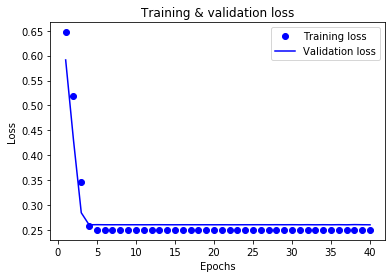

In [145]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

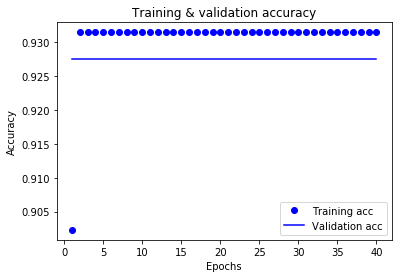

In [146]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#Need to be resolved:  Why training accuracy is a straight line?

# Mihir